In [1]:
# 패키지 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
sns.set()

In [2]:
# 가격 데이터 로드
with open('spx_price.pkl', 'rb') as f:
    price = pickle.load(f)

<Axes: >

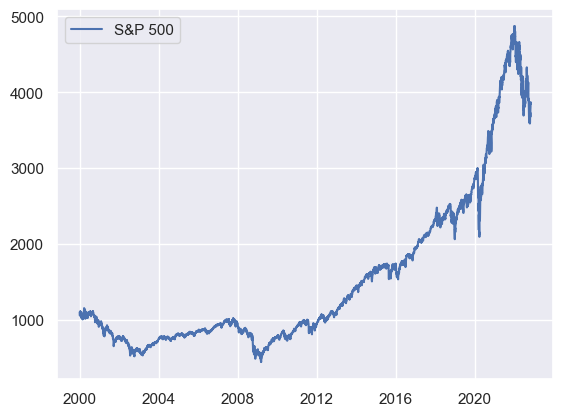

In [3]:
price.plot()

In [4]:
# 일간-주간 분산 전략 구현
class DailyWeekly:

    # 초기화 함수
    def __init__(self, price):

        # 가격
        self.price = price

        # 수익률
        self.rets = self.price.pct_change().dropna()
        
        # 거래비용
        self.cost = 0.0002

        # 가중치
        self.weights = self.calculate_weights(self.rets)

        # 포트폴리오 수익률
        self.port_rets = self.calculate_returns(self.rets, self.weights, self.cost)
        
        # 백테스팅 결과 시각화
        self.plot_port_returns(self.port_rets)

        # 샤프비율
        self.sharpe_ratio = self.calculate_sharpe_ratio(self.port_rets)

    # 가중치 계산 함수
    def calculate_weights(self, rets):
        
        # 빈 데이터프레임
        weights = pd.DataFrame(0, index=rets.index, columns=rets.columns)
        
        # 가중치 계산
        for x in range(1, 6):
            weights -= rets.shift(x-1) * (1/x)

        return weights
    
    # 포트폴리오 수익률 계산 함수
    def calculate_returns(self, rets, weights, cost):

        # 포트폴리오 수익률
        port_rets = weights.shift() * rets - abs(weights.diff()) * cost

        return port_rets

    # 샤프비율 계산
    def calculate_sharpe_ratio(self, total_returns):
        sharpe_ratio = total_returns.mean() * np.sqrt(252) / total_returns.std()

        return sharpe_ratio

    # 결과 시각화    
    def plot_port_returns(self, port_rets):
        plt.figure(figsize=(12, 6))
        plt.plot(port_rets.cumsum())
        plt.show()

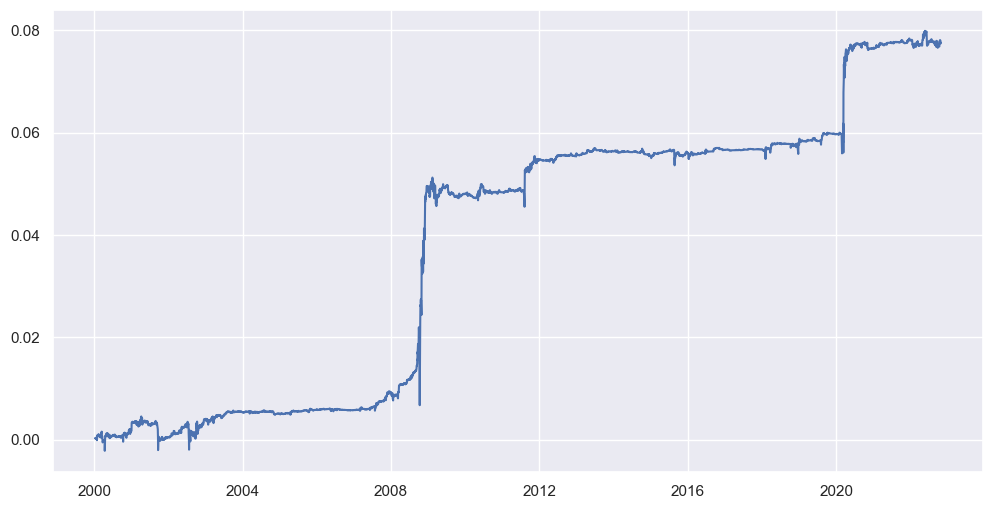

In [5]:
# 백테스트 수행
dw = DailyWeekly(price)

In [6]:
dw.sharpe_ratio

S&P 500    0.516949
dtype: float64